# AF5365 Project

## Group Number:7

## Names of your group members: Wenyi ZHANG, Oi Yung CHAN, Lok Ka CHIU, Han LIU, Zeyu ZHU

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import datetime

!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import time

import matplotlib.pyplot as plt
%matplotlib inline

import random
from scipy.optimize import minimize
import math

!pip install statsmodels
import statsmodels.api as sm

# Part I
## 1.1 
The file data1.xlsx contains the monthly returns of n = 4 stocks over January 2006-
December 2010: 1. Exxon Mobil (XOM), 2. Apple (AAPL), 3. Procter and Gamble (PG),
and 4. Pfizer (PFE). Use Python to solve the following questions

### (a). Calculate the variance-covariance matrix.

In [2]:
#Input data
dataset = pd.read_excel('data1.xlsx')

In [3]:
#Set an index
dataset.set_index('DATE', inplace = True)
dataset.head()

,XOM,AAPL,PG,PFE
DATE,,,,
20060131,0.117144,0.050355,0.028162,0.101201
20060228,-0.048765,-0.092968,0.011818,0.029206
20060331,0.025097,-0.084246,-0.038378,-0.048492
20060428,0.036477,0.122290,0.015443,0.016453
20060531,-0.029328,-0.150874,-0.068030,-0.056455


In [4]:
#Set a variance matrix.
data_all_var=pd.DataFrame({'XOM':dataset['XOM'].var(),
                           'AAPL':dataset['AAPL'].var(),
                           'PG':dataset['PG'].var(),
                           'PFE':dataset['PFE'].var()},
                          index=[0])

data_all_var

,XOM,AAPL,PG,PFE
0,0.002656,0.012978,0.002389,0.004029


In [5]:
#Set a covariance matrix.
dataset.cov()

,XOM,AAPL,PG,PFE
XOM,0.002656,0.002408,0.000757,0.001068
AAPL,0.002408,0.012978,0.001648,0.001532
PG,0.000757,0.001648,0.002389,0.001480
PFE,0.001068,0.001532,0.001480,0.004029


### (b). Assume a vector of expected returns as follows 𝑟̅= (0.10, 0.15, 0.06, 0.09). Plot the efficient frontier for these assets.

In [6]:
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [7]:
#Inpout the expected returns
exp_ret = np.array([0.10, 0.15, 0.06, 0.09])

In [8]:
#Define the variables
#Calculate return and volatility
def get_ret_vol(weights):
    weights = np.array(weights) 
    ret = np.sum(exp_ret * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(dataset.cov()*12, weights)))
    return np.array([ret, vol])


def check_sum(weights):
    return np.sum(weights)-1

In [9]:
#Set of possible returns 
frontier_y  = np.linspace(0.06,0.15,1000)

In [10]:
#Set bounds and initial guesses
bounds = ((0,1),(0,1),(0,1),(0,1))
init_guess = [0.25,0.25,0.25,0.25]

In [11]:
#Extract volatility
def minimize_volatility(weights):
    return get_ret_vol(weights)[1]

In [12]:
#Caucluate the efficient frontier
frontier_x = []
possible_weights= []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])
    #extract the weights of each portfolio
    possible_weights.append(result['x'])

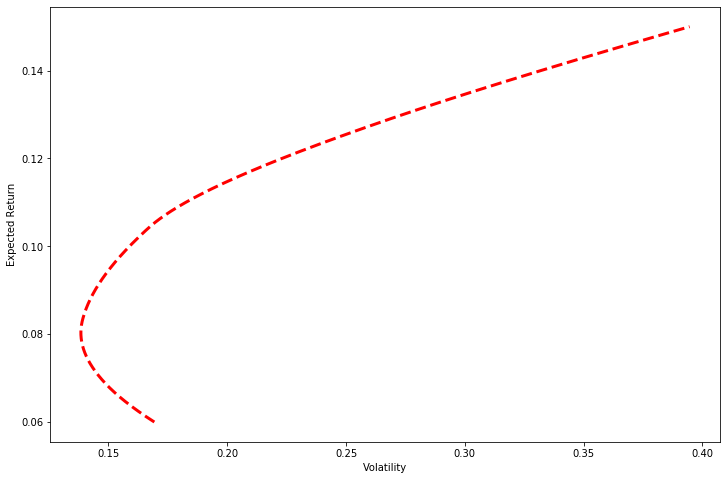

In [13]:
#Draw the efficient frontier
plt.figure(figsize=(12,8))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.plot(frontier_x, frontier_y, 'r--', linewidth=3)

### (c). Find a portfolio on the efficient frontier with an expected return of 13%. What are the investment proportions (weights) in each asset in this portfolio? What is the s.d. of this portfolio? What is the correlation of this portfolio with each of the assets?

In [14]:
#Input the portfolio expected return
exp_ret_c = 0.13

In [15]:
#Find the point in the question a which expected return is 13%
np.where(frontier_y == exp_ret_c)

(array([777], dtype=int64),)

In [16]:
#Export the s.d.
std_c = frontier_x [777] 
std_c

0.2739319708039464

In [17]:
#Export the weights
possible_weights[777].round(6)

array([0.4, 0.6, 0. , 0. ])

In [18]:
#Calculate the correlation of this portfolio
weights = possible_weights[777]
dataset['portfolio'] = weights[0]*dataset['XOM'] + weights[1]*dataset['AAPL'] + weights[2]*dataset['PG']+ weights[3]*dataset['PFE']

dataset.corr()

,XOM,AAPL,PG,PFE,portfolio
XOM,1.000000,0.410175,0.300718,0.326550,0.615253
AAPL,0.410175,1.000000,0.296065,0.211832,0.971323
PG,0.300718,0.296065,1.000000,0.477155,0.334313
PFE,0.326550,0.211832,0.477155,1.000000,0.268238
portfolio,0.615253,0.971323,0.334313,0.268238,1.000000


### (d). Find a portfolio on the efficient frontier with expected return of 8%. Now plot all the combinations of the two portfolios (the one you found in part (c) and the one you just found here) in the mean-s.d. space (that is, x-axis is s.d. and y-axis is expected return). Show that the picture you obtain is the same as in part (b) of this question.

In [19]:
#Input the portfolio expected return
exp_ret_d = 0.08

In [20]:
#Find the point in the question a which expected return is 13%
np.where(frontier_y == exp_ret_d)

(array([222], dtype=int64),)

In [21]:
#Export the s.d.
std_d = frontier_x [222] 
std_d 

0.13838633508241352

In [22]:
#Export the weights
possible_weights[222].round(6)

array([0.417372, 0.      , 0.472457, 0.110171])

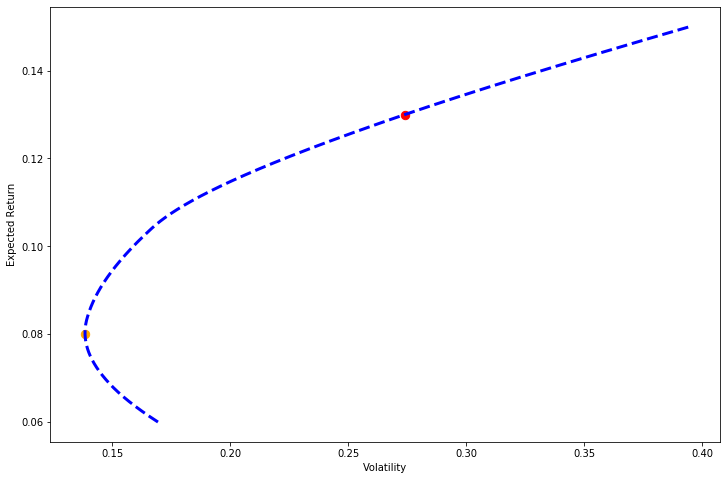

In [23]:
plt.figure(figsize=(12,8))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.plot(frontier_x, frontier_y, 'b--', linewidth=3)
#Mark the points find out in qestion c and d by different color
plt.scatter(std_c, exp_ret_c,c='Red', s=70) 
plt.scatter(std_d, exp_ret_d,c='Orange', s=70) 

plt.show()

### (e). Plot the efficient frontier for the case where there are only 3 stocks: XOM, AAPL, and PG, or when there are only two stocks: XOM and AAPL. Compare the three pictures (two pictures you just plotted here and one picture in part (b)) and discuss the differences and similarities.

#### (e1). Plot the efficient frontier for the case where there are only 3 stocks: XOM, AAPL, and PG

In [24]:
#Establish the dataset 
dataset1 = dataset.drop(columns=['PFE','portfolio'])
dataset1.head()

,XOM,AAPL,PG
DATE,,,
20060131,0.117144,0.050355,0.028162
20060228,-0.048765,-0.092968,0.011818
20060331,0.025097,-0.084246,-0.038378
20060428,0.036477,0.122290,0.015443
20060531,-0.029328,-0.150874,-0.068030


In [25]:
#Input the Expect return of these three stocks
exp_ret_e1 = np.array([0.10, 0.15, 0.06])

#Define the variables
#Calculate return and volatility
def get_ret_vol_e1(weights):
    weights = np.array(weights) 
    ret = np.sum(exp_ret_e1 * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(dataset1.cov()*12, weights)))
    return np.array([ret, vol])

def check_sum_e1(weights):
    return np.sum(weights)-1

In [26]:
#Set of possible returns
frontier_y_e1  = np.linspace(0.06,0.15,1000)

#Set bounds and initial guesses
bounds_e1 = ((0,1),(0,1),(0,1))
init_guess_e1 = [1/3,1/3,1/3]

#Extract volatility
def minimize_volatility_e1(weights):
    return get_ret_vol_e1(weights)[1]

In [27]:
#Caucluate the efficient frontier
frontier_x_e1 = []
possible_weights_e1= []

for possible_return in frontier_y_e1:
    cons = ({'type':'eq', 'fun':check_sum_e1},
            {'type':'eq', 'fun': lambda w: get_ret_vol_e1(w)[0] - possible_return})
    
    result = minimize(minimize_volatility_e1,init_guess_e1,method='SLSQP', bounds=bounds_e1, constraints=cons)
    frontier_x_e1.append(result['fun'])
    possible_weights_e1.append(result['x'])

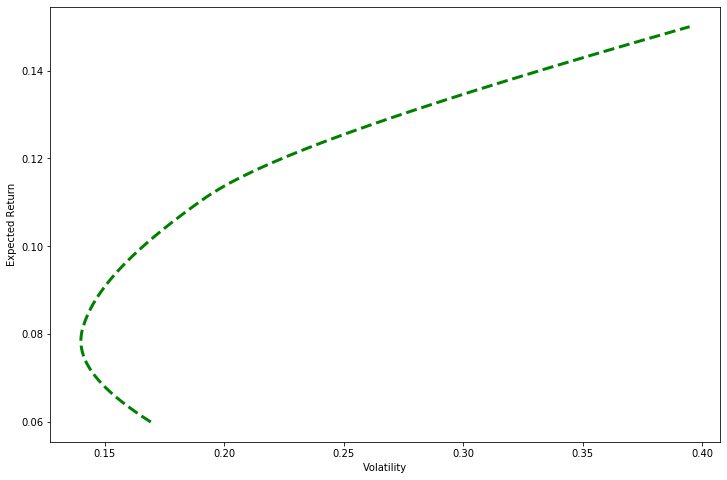

In [28]:
#Draw the efficient frontier in green
plt.figure(figsize=(12,8))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.plot(frontier_x_e1, frontier_y_e1, 'g--', linewidth=3)

#### (e2). Plot the efficient frontier for the case where there are only 2 stocks: XOM and AAPL

In [29]:
#Establish the dataset 
dataset2 = dataset.drop(columns=['PG','PFE','portfolio'])
dataset2.head()

,XOM,AAPL
DATE,,
20060131,0.117144,0.050355
20060228,-0.048765,-0.092968
20060331,0.025097,-0.084246
20060428,0.036477,0.122290
20060531,-0.029328,-0.150874


In [30]:
#Input the Expect return of these three stocks
exp_ret_e2 = np.array([0.10, 0.15])

In [31]:
#Define the variables
#Calculate return and volatility
def get_ret_vol_e2(weights):
    weights = np.array(weights) 
    ret = np.sum(exp_ret_e2 * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(dataset2.cov()*12, weights)))
    return np.array([ret, vol])

def check_sum_e2(weights):
    return np.sum(weights)-1

#Set of possible returns. 
#As this time the smallest expected return in this two stock in 10%, the possible return is 10% to 15%.
frontier_y_e2  = np.linspace(0.10,0.15,1000)

#set bounds and initial guesses
bounds_e2 = ((0,1),(0,1))
init_guess_e2 = [0.5,0.5]

# extract volatility
def minimize_volatility_e2(weights):
    return get_ret_vol_e2(weights)[1]

In [32]:
#Caucluate the efficient frontier
frontier_x_e2 = []
possible_weights_e2= []

for possible_return in frontier_y_e2:
    cons = ({'type':'eq', 'fun':check_sum_e2},
            {'type':'eq', 'fun': lambda w: get_ret_vol_e2(w)[0] - possible_return})
    
    result = minimize(minimize_volatility_e2,init_guess_e2,method='SLSQP', bounds=bounds_e2, constraints=cons)
    frontier_x_e2.append(result['fun'])
    possible_weights_e2.append(result['x'])

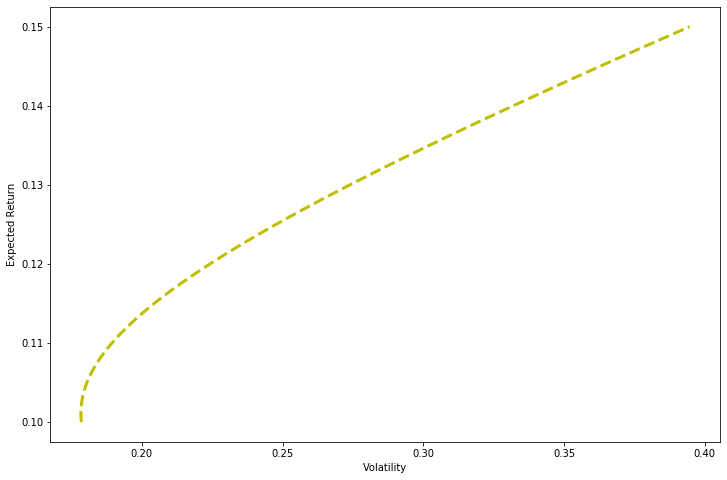

In [33]:
#Draw the efficient frontier in green
plt.figure(figsize=(12,8))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.plot(frontier_x_e2, frontier_y_e2, 'y--', linewidth=3)

#### (e3) Compare the three pictures

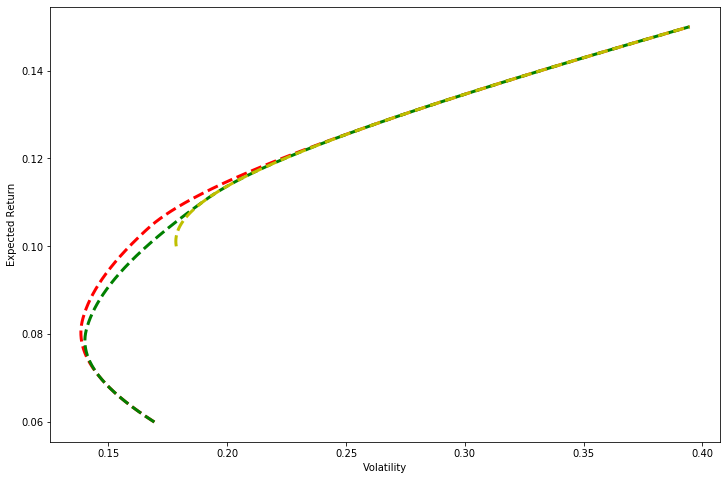

In [34]:
#Draw all the lines togother to see it clearly
plt.figure(figsize=(12,8))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.plot(frontier_x, frontier_y, 'r--', linewidth=3)
plt.plot(frontier_x_e1, frontier_y_e1, 'g--', linewidth=3)
plt.plot(frontier_x_e2, frontier_y_e2, 'y--', linewidth=3)

# 1.2
The file FundRet.xlsx contains the monthly returns of n = 3 mutual funds over
January 2003 - December 2007. The file also contains the risk-free rate for the same time
period. Compute the following performance measures for each of the mutual funds using
Python and discuss the results.

(a). Sharpe ratio

(b). Treynor’s ratio

(c). CAPM alpha (Hint: see the Jupyter notebook from lecture.)

In [35]:
# read fund data from excel and store as dataframe
fund_data = pd.read_excel('FundRet.xlsx')
fund_data.set_index('date', inplace = True)
fund_data.head()

,fund1,fund2,fund3,rf
date,,,,
2003-01-31,-0.027933,-0.027496,0.011157,0.0010
2003-02-28,-0.022988,-0.023065,-0.042092,0.0009
2003-03-31,0.001471,0.005331,-0.076792,0.0010
2003-04-30,0.107195,0.069697,-0.008318,0.0010
2003-05-30,0.083554,0.060198,0.111836,0.0009


## (a). Sharpe ratio

In [36]:
#get the fund returns
fund_df = fund_data.iloc[:,:3]
fund_df.head()

,fund1,fund2,fund3
date,,,
2003-01-31,-0.027933,-0.027496,0.011157
2003-02-28,-0.022988,-0.023065,-0.042092
2003-03-31,0.001471,0.005331,-0.076792
2003-04-30,0.107195,0.069697,-0.008318
2003-05-30,0.083554,0.060198,0.111836


In [37]:
#get risk-free rate
rf_df = fund_data['rf']
rf_df.head()

date
2003-01-31    0.0010
2003-02-28    0.0009
2003-03-31    0.0010
2003-04-30    0.0010
2003-05-30    0.0009
Name: rf, dtype: float64

In [38]:
#calculate std of fund returns
fund_std = fund_df.std()
fund_std

fund1    0.039355
fund2    0.023055
fund3    0.078962
dtype: float64

In [39]:
#calculate Sharpe Ratio for the funds
fund_sharpe = (fund_df.mean()-rf_df.mean())/fund_std

print('-'*15+'Sharpe Ratio'+'-'*15+'\n')
fund_sharpe

---------------Sharpe Ratio---------------



fund1    0.306903
fund2    0.316560
fund3    0.237944
dtype: float64

## (b). Treynor’s ratio

In [40]:
from alpha_vantage.timeseries import TimeSeries
import time

# If you want to download the data please use your alpha vantage key
ts = TimeSeries(key='HWG160FFK660BVF7', output_format='pandas')

ticker ='NDAQ'
filename = ticker + '.csv'# Set the file name of the CSV for each stock using ticker
data, meta_data = ts.get_monthly_adjusted(symbol= ticker)
data = data['2007':'2002-12-31']
data.to_csv(filename)

In [41]:
# Market return should really be returns on stock indices i.e.NDAQ
market_return = data.sort_values(by='date')
market_return = market_return['5. adjusted close']
market_return = np.log(market_return/market_return.shift(1))
market_return = market_return.drop(market_return.index[0])
market_return.head()

date
2003-01-31   -0.094306
2003-02-28   -0.160580
2003-03-31   -0.108947
2003-04-30   -0.098191
2003-05-30   -0.016130
Name: 5. adjusted close, dtype: float64

In [42]:
fund_df['market'] = market_return
fund_df.head()

,fund1,fund2,fund3,market
date,,,,
2003-01-31,-0.027933,-0.027496,0.011157,-0.094306
2003-02-28,-0.022988,-0.023065,-0.042092,-0.160580
2003-03-31,0.001471,0.005331,-0.076792,-0.108947
2003-04-30,0.107195,0.069697,-0.008318,-0.098191
2003-05-30,0.083554,0.060198,0.111836,-0.016130


In [43]:
X = fund_df['market']
# Add a constant to the independent value
X1 = sm.add_constant(X)

beta_dict = {}
alpha_dict = {}
treynor_dict = {}

for col in fund_df.columns:

    if col !='market':    

        y = fund_df[col]

        #regression model
        model = sm.OLS(y,X1)

        #fit model and print results
        results = model.fit()

        beta_dict[col] = results.params[1]
        treynor_dict[col] = (y.mean() - rf_df.mean())/results.params[1]
        alpha_dict[col] = results.params[0]

beta_df = pd.DataFrame(columns=["beta"], index=beta_dict.keys(), data=beta_dict.values())        
alpha_df = pd.DataFrame(columns=["alpha"], index=alpha_dict.keys(), data=alpha_dict.values())        
treynor_df = pd.DataFrame(columns=["treynor"], index=treynor_dict.keys(), data=treynor_dict.values()) 

print('\n' + '-'*15+'Beta'+'-'*15+'\n')
print(beta_df.iloc[:,0])

print('\n' + '-'*15+'Treynor Ratio'+'-'*15+'\n')
print(treynor_df.iloc[:,0])


---------------Beta---------------

fund1    0.093686
fund2    0.029195
fund3    0.132450
Name: beta, dtype: float64

---------------Treynor Ratio---------------

fund1    0.128922
fund2    0.249976
fund3    0.141855
Name: treynor, dtype: float64


## (c). CAPM alpha

In [44]:
print('\n' + '-'*15+'Alpha'+'-'*15+'\n')
print(alpha_df.iloc[:,0])


---------------Alpha---------------

fund1    0.011984
fund2    0.008923
fund3    0.017662
Name: alpha, dtype: float64


# Part II
## 2.1 
Use the website crawling skills you have learned from this class to obtain a full list of
stocks (Symbols/Tickers) in the Dow Jones index from the website below:
https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average.

In [45]:
url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
response = requests.get(url)

In [46]:
# Save the html to the local computer 
filename = 'dji_index.html' 
outputfile = open(filename, 'w', encoding="UTF-8")
outputfile.write(response.text) 
outputfile.close() 

In [47]:
# Open the saved HTML file
dji_index = open('dji_index.html', 'rb')

In [48]:
soup = BeautifulSoup(dji_index)

In [49]:
table_2 = soup.find_all('table')[1]

In [50]:
dji_tickers = []
for tickers in table_2.find_all('a',class_="external text"):
    dji_tickers.append(tickers.get_text())

In [51]:
print(dji_tickers)

['[update]', 'MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']


## 2.2 
Use Yahoo Financials API or any other APIs to download data for each stock in the
index from January 1, 2020 to the most current date that is available in the data.

In [52]:
from yahoofinancials import YahooFinancials

In [53]:
tech_stocks =  ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']

techStocks_raw = YahooFinancials(tech_stocks)

techStocks_raw_data = techStocks_raw.get_historical_price_data('2020-01-01', '2020-11-30','daily')

In [54]:
print(techStocks_raw_data)

{'MMM': {'eventsData': {'dividends': {'2020-02-13': {'amount': 1.47, 'date': 1581604200, 'formatted_date': '2020-02-13'}, '2020-05-21': {'amount': 1.47, 'date': 1590067800, 'formatted_date': '2020-05-21'}, '2020-11-19': {'amount': 1.47, 'date': 1605796200, 'formatted_date': '2020-11-19'}, '2020-08-21': {'amount': 1.47, 'date': 1598016600, 'formatted_date': '2020-08-21'}}}, 'firstTradeDate': {'formatted_date': '1970-01-02', 'date': 138600}, 'currency': 'USD', 'instrumentType': 'EQUITY', 'timeZone': {'gmtOffset': -18000}, 'prices': [{'date': 1577975400, 'high': 180.00999450683594, 'low': 177.13999938964844, 'open': 177.67999267578125, 'close': 180.0, 'volume': 3601700, 'adjclose': 173.53823852539062, 'formatted_date': '2020-01-02'}, {'date': 1578061800, 'high': 178.66000366210938, 'low': 175.6300048828125, 'open': 177.02000427246094, 'close': 178.4499969482422, 'volume': 2466900, 'adjclose': 172.04388427734375, 'formatted_date': '2020-01-03'}, {'date': 1578321000, 'high': 178.71000671386

## 2.3 
Calculate the stock return for each stock in this year. Which stock has the best stock
performance in this year? Please provide your understanding of why this stock performs
so well in this year.

In [55]:
import pandas as pd
from datetime import datetime

In [56]:
tickers = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']

In [57]:
stock_data = {}

In [58]:
from alpha_vantage.timeseries import TimeSeries
import time


ts = TimeSeries(key='D94WPGKLP7H4NFTS', output_format='pandas')

tickers = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']

for ticker in tickers: 
    filename = ticker + '.csv'
    data, meta_data = ts.get_daily_adjusted(symbol= ticker , outputsize='full')
    data = data[:'2020'] 
    stock_data[ticker] = data
    data.to_csv(filename)
    time.sleep(10)  

In [59]:
for ticker in tickers:
    filename = ticker + '.csv'
    data = pd.read_csv(filename, index_col = 0)
    stock_data[ticker] = data

In [60]:
stock_data

{'MMM':             1. open  2. high  3. low  4. close  5. adjusted close  6. volume  \
 date                                                                           
 2020-12-04   172.13   173.16  171.54    172.46         172.460000  2663697.0   
 2020-12-03   171.04   173.39  171.04    171.83         171.830000  2377756.0   
 2020-12-02   170.26   172.58  170.22    171.85         171.850000  2421915.0   
 2020-12-01   174.22   175.69  170.01    170.52         170.520000  3851211.0   
 2020-11-30   175.77   176.00  172.70    172.73         172.730000  6141333.0   
 ...             ...      ...     ...       ...                ...        ...   
 2020-01-08   178.00   181.50  177.65    180.63         174.109019  2758311.0   
 2020-01-07   178.28   178.51  176.82    177.90         171.477575  2172979.0   
 2020-01-06   177.15   178.71  176.35    178.62         172.171582  1996293.0   
 2020-01-03   177.02   178.66  175.63    178.45         172.007719  2466777.0   
 2020-01-02   177.68 

In [61]:
stock_final_data = pd.DataFrame()
for ticker in tickers:
    stock_final_data[ticker] = stock_data[ticker]['5. adjusted close']

In [62]:
stock_final_data.head()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
date,,,,,,,,,,,,,,,,,,,,,
2020-12-04,172.46,125.04,229.21,122.25,232.71,182.21,93.28,44.38,53.85,55.05,...,137.190000,137.47,225.86,136.16,349.890000,61.55,212.68,43.41,148.91,154.14
2020-12-03,171.83,123.12,226.91,122.94,237.20,174.63,89.80,44.11,52.78,53.60,...,136.686010,137.34,220.97,135.09,347.438757,61.74,208.05,42.82,149.30,153.24
2020-12-02,171.85,122.33,226.56,123.08,223.85,173.87,89.87,43.89,52.11,53.20,...,135.308771,138.36,220.78,134.04,346.322744,61.36,210.18,39.84,150.52,153.61
2020-12-01,170.52,119.93,225.08,122.72,213.01,173.26,87.45,43.54,52.04,53.53,...,135.169051,139.37,241.35,133.41,339.975420,60.58,211.20,38.46,152.64,149.44
2020-11-30,172.73,118.59,222.04,119.05,210.71,173.59,87.18,43.02,51.60,53.01,...,134.430531,138.87,245.80,129.65,335.142686,60.41,210.35,38.01,152.79,148.01


In [63]:
stock_final_data = stock_final_data.sort_values(by='date', ascending=True)
stock_final_data.head()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,173.501762,124.075405,233.667165,74.443573,331.333853,146.176216,114.952555,47.172648,53.186788,50.462729,...,101.243664,120.438528,166.99,134.620227,287.871986,58.484661,189.940500,56.549286,117.401654,148.20
2020-01-03,172.007719,122.843031,232.080836,73.719833,330.777189,144.146665,114.554959,46.402999,52.896626,49.214070,...,100.966284,119.628513,166.17,134.140524,284.958820,57.861974,188.429881,56.549286,116.365234,146.50
2020-01-06,172.171582,122.310645,233.861806,74.307252,331.751350,144.049557,114.166830,46.568620,52.877281,49.016913,...,100.877126,119.794420,173.45,134.287372,286.937017,57.737437,188.022411,57.037440,116.128338,145.65
2020-01-07,171.477575,121.669811,231.662357,73.957775,335.270256,142.146246,112.708978,46.266606,52.471054,48.998136,...,100.827594,119.052719,176.00,132.319612,285.204864,57.095591,187.525497,56.750291,115.052436,145.70
2020-01-08,174.109019,123.769776,231.837534,75.147484,329.395472,143.408647,111.421525,46.295833,52.567775,49.505110,...,100.599747,119.560198,177.33,133.739140,291.218190,57.200968,190.735563,53.438501,114.657610,145.40


In [64]:
#Calculating the Log Returns for each stock
stock_log_ret = np.log(stock_final_data/stock_final_data.shift(1))
stock_log_ret

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.008648,-0.009982,-0.006812,-0.009770,-0.001681,-0.013982,-0.003465,-0.016450,-0.005470,-0.025055,...,-0.002743,-0.006748,-0.004923,-0.003570,-0.010171,-0.010704,-0.007985,0.000000,-0.008867,-0.011537
2020-01-06,0.000952,-0.004343,0.007645,0.007937,0.002941,-0.000674,-0.003394,0.003563,-0.000366,-0.004014,...,-0.000883,0.001386,0.042878,0.001094,0.006918,-0.002155,-0.002165,0.008595,-0.002038,-0.005819
2020-01-07,-0.004039,-0.005253,-0.009449,-0.004714,0.010551,-0.013301,-0.012852,-0.006506,-0.007712,-0.000383,...,-0.000491,-0.006211,0.014595,-0.014762,-0.006055,-0.011179,-0.002646,-0.005047,-0.009308,0.000343
2020-01-08,0.015229,0.017112,0.000756,0.015958,-0.017678,0.008842,-0.011489,0.000632,0.001842,0.010294,...,-0.002262,0.004254,0.007528,0.010671,0.020865,0.001844,0.016973,-0.060129,-0.003438,-0.002061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,-0.023798,-0.016724,-0.012398,0.020880,-0.027108,-0.008547,-0.046285,0.007466,-0.013179,-0.044099,...,0.003346,0.001874,-0.007417,-0.036279,-0.004746,-0.002810,-0.003085,-0.025712,0.007819,0.005963
2020-12-01,-0.012877,0.011236,0.013598,0.030362,0.010856,-0.001903,0.003092,0.012015,0.008491,0.009762,...,0.005479,0.003594,-0.018270,0.028589,0.014317,0.002810,0.004033,0.011769,-0.000982,0.009615
2020-12-02,0.007769,0.019814,0.006554,0.002929,0.049637,0.003515,0.027297,0.008006,0.001344,-0.006184,...,0.001033,-0.007273,-0.089081,0.004711,0.018498,0.012793,-0.004841,0.035253,-0.013986,0.027522


In [65]:
#Calculating the Expected Returns for each stock
MMM = stock_log_ret['MMM'].mean()
MMM_ann_ret = MMM * 252
print (str(MMM_ann_ret*100)+' %')

AXP = stock_log_ret['AXP'].mean()
AXP_ann_ret = AXP * 252
print (str(AXP_ann_ret*100)+' %')

AMGN = stock_log_ret['AMGN'].mean()
AMGN_ann_ret = AMGN * 252
print (str(AMGN_ann_ret*100)+' %')

AAPL = stock_log_ret['AAPL'].mean()
AAPL_ann_ret = AAPL * 252
print (str(AAPL_ann_ret*100)+' %')

BA = stock_log_ret['BA'].mean()
BA_ann_ret = BA * 252
print (str(BA_ann_ret*100)+' %')

CAT = stock_log_ret['CAT'].mean()
CAT_ann_ret = CAT * 252
print (str(CAT_ann_ret*100)+' %')

CVX = stock_log_ret['CVX'].mean()
CVX_ann_ret = CVX * 252
print (str(CVX_ann_ret*100)+' %')

CSCO = stock_log_ret['CSCO'].mean()
CSCO_ann_ret = CSCO * 252
print (str(CSCO_ann_ret*100)+' %')

KO = stock_log_ret['KO'].mean()
KO_ann_ret = KO * 252
print (str(KO_ann_ret*100)+' %')

DOW = stock_log_ret['DOW'].mean()
DOW_ann_ret = DOW * 252
print (str(DOW_ann_ret*100)+' %')

GS = stock_log_ret['GS'].mean()
GS_ann_ret = GS * 252
print (str(GS_ann_ret*100)+' %')

HD = stock_log_ret['HD'].mean()
HD_ann_ret = HD * 252
print (str(HD_ann_ret*100)+' %')

HON = stock_log_ret['HON'].mean()
HON_ann_ret = HON * 252
print (str(HON_ann_ret*100)+' %')

IBM = stock_log_ret['IBM'].mean()
IBM_ann_ret = IBM * 252
print (str(IBM_ann_ret*100)+' %')

INTC = stock_log_ret['INTC'].mean()
INTC_ann_ret = INTC * 252
print (str(INTC_ann_ret*100)+' %')

JNJ = stock_log_ret['JNJ'].mean()
JNJ_ann_ret = JNJ * 252
print (str(JNJ_ann_ret*100)+' %')

JPM = stock_log_ret['JPM'].mean()
JPM_ann_ret = JPM  * 252
print (str(JPM_ann_ret*100)+' %')

MCD = stock_log_ret['MCD'].mean()
MCD_ann_ret = MCD * 252
print (str(MCD_ann_ret*100)+' %')

MRK = stock_log_ret['MRK'].mean()
MRK_ann_ret = MRK * 252
print (str(MRK_ann_ret*100)+' %')

MSFT = stock_log_ret['MSFT'].mean()
MSFT_ann_ret = MSFT * 252
print (str(MSFT_ann_ret*100)+' %')

NKE = stock_log_ret['NKE'].mean()
NKE_ann_ret = NKE * 252
print (str(NKE_ann_ret*100)+' %')

PG = stock_log_ret['PG'].mean()
PG_ann_ret = PG * 252
print (str(PG_ann_ret*100)+' %')

CRM = stock_log_ret['CRM'].mean()
CRM_ann_ret = CRM * 252
print (str(CRM_ann_ret*100)+' %')

TRV = stock_log_ret['TRV'].mean()
TRV_ann_ret = TRV * 252
print (str(TRV_ann_ret*100)+' %')

UNH = stock_log_ret['UNH'].mean()
UNH_ann_ret = UNH * 252
print (str(UNH_ann_ret*100)+' %')

VZ = stock_log_ret['VZ'].mean()
VZ_ann_ret = VZ * 252
print (str(VZ_ann_ret*100)+' %')

V = stock_log_ret['V'].mean()
V_ann_ret = V * 252
print (str(V_ann_ret*100)+' %')

WBA = stock_log_ret['WBA'].mean()
WBA_ann_ret = WBA * 252
print (str(WBA_ann_ret*100)+' %')

WMT = stock_log_ret['WMT'].mean()
WMT_ann_ret = WMT * 252
print (str(WMT_ann_ret*100)+' %')

DIS = stock_log_ret['DIS'].mean()
DIS_ann_ret = DIS * 252
print (str(DIS_ann_ret*100)+' %')

-0.6485695511094136 %
0.8339911475167137 %
-2.074058540614325 %
53.41826016857366 %
-38.0512937413271 %
23.729678654784365 %
-22.498404733806087 %
-6.57195681326462 %
1.3345641396043526 %
9.36996784101017 %
4.975645825621848 %
22.35012069723999 %
19.97536499890635 %
-1.2696700617919152 %
-14.307492349489165 %
6.04216510696421 %
-11.495727822947451 %
7.885380834454349 %
-10.029880211259666 %
32.21688673092297 %
32.72087523233253 %
14.244055452293985 %
32.52107469812745 %
1.2247829660303031 %
21.011084888071956 %
5.50149770848366 %
12.177611774449504 %
-28.476296301851033 %
25.602888025915654 %
4.232153421769621 %


In [66]:
#Get the best stock
stock_log_ret.mean().idxmax()

'AAPL'

In [67]:
stock_log_ret.describe()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,2.340000e+02,234.000000,234.000000,234.000000,234.000000
mean,-0.000026,0.000033,-0.000082,0.002120,-0.001510,0.000942,-0.000893,-0.000261,0.000053,0.000372,...,0.001298,0.000565,0.001291,0.000049,0.000834,2.183134e-04,0.000483,-0.001130,0.001016,0.000168
std,0.024398,0.041096,0.024720,0.030136,0.057357,0.029450,0.040243,0.027409,0.022690,0.040966,...,0.026825,0.021100,0.033906,0.032433,0.031556,1.585259e-02,0.027765,0.031545,0.020332,0.030455
min,-0.097363,-0.160388,-0.086220,-0.137708,-0.272444,-0.154109,-0.250062,-0.118615,-0.101728,-0.244082,...,-0.124053,-0.091428,-0.173027,-0.233199,-0.189671,-6.849796e-02,-0.145571,-0.116102,-0.095092,-0.139085
25%,-0.010767,-0.017281,-0.012208,-0.011347,-0.027964,-0.013178,-0.017832,-0.011701,-0.007831,-0.019231,...,-0.009661,-0.005531,-0.013805,-0.013665,-0.011077,-6.661023e-03,-0.011647,-0.018604,-0.008142,-0.012272
50%,0.001367,0.000329,-0.002247,0.001675,-0.001697,0.002045,-0.001863,0.000000,0.000408,0.000649,...,0.001177,0.001341,0.002913,0.002250,0.001222,-6.888845e-07,0.002555,-0.000450,-0.000278,-0.001566
75%,0.011173,0.017439,0.010582,0.017469,0.020368,0.016216,0.014052,0.011715,0.010034,0.023095,...,0.013818,0.007488,0.017451,0.015005,0.010812,6.169978e-03,0.013232,0.014870,0.008019,0.013588
max,0.118659,0.197885,0.103438,0.113157,0.217678,0.098324,0.204904,0.125517,0.062783,0.189869,...,0.141284,0.113409,0.231468,0.124783,0.120437,6.960675e-02,0.129647,0.118704,0.110723,0.134639


In [68]:
AAPL_price_df = pd.DataFrame.from_dict(techStocks_raw_data['AAPL']['prices'])
AAPL_adjclose = AAPL_price_df['adjclose']

In [69]:
AAPL_price_df = AAPL_price_df.drop(columns=['date', 'formatted_date'])

In [70]:
AAPL_log_ret = np.log(AAPL_price_df) - np.log(AAPL_price_df.shift(1))

In [71]:
AAPL_log_ret.describe()

,high,low,open,close,volume,adjclose
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,0.001951,0.001983,0.001981,0.001921,-0.004652,0.001995
std,0.023934,0.025616,0.029931,0.030382,0.313391,0.030407
min,-0.097218,-0.091858,-0.090584,-0.137708,-1.112925,-0.137708
25%,-0.009203,-0.008147,-0.011726,-0.011494,-0.194565,-0.011494
50%,0.002241,0.004137,0.004392,0.001559,-0.053944,0.001559
75%,0.012911,0.013958,0.018136,0.017246,0.184747,0.017246
max,0.099904,0.097143,0.092812,0.113157,1.025911,0.113158


In [72]:
AAPL_price_df.head()

,high,low,open,close,volume,adjclose
0,75.150002,73.797501,74.059998,75.087502,135480400,73.840042
1,75.144997,74.125000,74.287498,74.357498,146322800,73.122154
2,74.989998,73.187500,73.447502,74.949997,118387200,73.704819
3,75.224998,74.370003,74.959999,74.597504,108872000,73.358185
4,76.110001,74.290001,74.290001,75.797501,132079200,74.538239


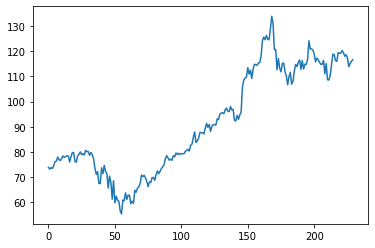

In [73]:
#Plot the adjusted close price of AAPL
AAPL_price_df['adjclose'].plot()

Text(0.5, 1.0, 'AAPL')

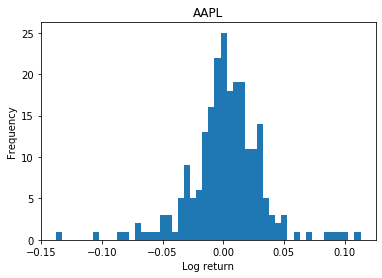

In [74]:
#Plot the log return of AAPL
AAPL_log_ret['adjclose'].plot.hist(bins=50)
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.title("AAPL")

## 2.4
Use the weights from this website (i.e., Index Weighting) to create a portfolio that
contains all stocks in the Dow Jones index with exactly the same weights. Calculate the
stock return of this portfolio in this year. Please evaluate this portfolio’s performance in
this year.

In [75]:
MMM_price_df = pd.DataFrame.from_dict(techStocks_raw_data['MMM']['prices'])
AXP_price_df = pd.DataFrame.from_dict(techStocks_raw_data['AXP']['prices'])
AMGN_price_df = pd.DataFrame.from_dict(techStocks_raw_data['AMGN']['prices'])
AAPL_price_df = pd.DataFrame.from_dict(techStocks_raw_data['AAPL']['prices'])
BA_price_df = pd.DataFrame.from_dict(techStocks_raw_data['BA']['prices'])
CAT_price_df = pd.DataFrame.from_dict(techStocks_raw_data['CAT']['prices'])
CVX_price_df = pd.DataFrame.from_dict(techStocks_raw_data['CVX']['prices'])
CSCO_price_df = pd.DataFrame.from_dict(techStocks_raw_data['CSCO']['prices'])
KO_price_df = pd.DataFrame.from_dict(techStocks_raw_data['KO']['prices'])
DOW_price_df = pd.DataFrame.from_dict(techStocks_raw_data['DOW']['prices'])
GS_price_df = pd.DataFrame.from_dict(techStocks_raw_data['GS']['prices'])
HD_price_df = pd.DataFrame.from_dict(techStocks_raw_data['HD']['prices'])
HON_price_df = pd.DataFrame.from_dict(techStocks_raw_data['HON']['prices'])
IBM_price_df = pd.DataFrame.from_dict(techStocks_raw_data['IBM']['prices'])
INTC_price_df = pd.DataFrame.from_dict(techStocks_raw_data['INTC']['prices'])
JNJ_price_df = pd.DataFrame.from_dict(techStocks_raw_data['JNJ']['prices'])
JPM_price_df = pd.DataFrame.from_dict(techStocks_raw_data['JPM']['prices'])
MCD_price_df = pd.DataFrame.from_dict(techStocks_raw_data['MCD']['prices'])
MRK_price_df = pd.DataFrame.from_dict(techStocks_raw_data['MRK']['prices'])
MSFT_price_df = pd.DataFrame.from_dict(techStocks_raw_data['MSFT']['prices'])
NKE_price_df = pd.DataFrame.from_dict(techStocks_raw_data['NKE']['prices'])
PG_price_df = pd.DataFrame.from_dict(techStocks_raw_data['PG']['prices'])
CRM_price_df = pd.DataFrame.from_dict(techStocks_raw_data['CRM']['prices'])
TRV_price_df = pd.DataFrame.from_dict(techStocks_raw_data['TRV']['prices'])
UNH_price_df = pd.DataFrame.from_dict(techStocks_raw_data['UNH']['prices'])
VZ_price_df = pd.DataFrame.from_dict(techStocks_raw_data['VZ']['prices'])
V_price_df = pd.DataFrame.from_dict(techStocks_raw_data['V']['prices'])
WBA_price_df = pd.DataFrame.from_dict(techStocks_raw_data['WBA']['prices'])
WMT_price_df = pd.DataFrame.from_dict(techStocks_raw_data['WMT']['prices'])
DIS_price_df = pd.DataFrame.from_dict(techStocks_raw_data['DIS']['prices'])

In [76]:
MMM_adjclose = MMM_price_df['adjclose']
AXP_adjclose = AXP_price_df['adjclose']
AMGN_adjclose = AMGN_price_df['adjclose']
AAPL_adjclose = AAPL_price_df['adjclose']
BA_adjclose = BA_price_df['adjclose']
CAT_adjclose = CAT_price_df['adjclose']
CVX_adjclose = CVX_price_df['adjclose']
CSCO_adjclose = CSCO_price_df['adjclose']
KO_adjclose = KO_price_df['adjclose']
DOW_adjclose = DOW_price_df['adjclose']
GS_adjclose = GS_price_df['adjclose']
HD_adjclose = HD_price_df['adjclose']
HON_adjclose = HON_price_df['adjclose']
IBM_adjclose = IBM_price_df['adjclose']
INTC_adjclose = INTC_price_df['adjclose']
JNJ_adjclose = JNJ_price_df['adjclose']
JPM_adjclose = JPM_price_df['adjclose']
MCD_adjclose = MCD_price_df['adjclose']
MRK_adjclose = MRK_price_df['adjclose']
MSFT_adjclose = MSFT_price_df['adjclose']
NKE_adjclose = NKE_price_df['adjclose']
PG_adjclose = PG_price_df['adjclose']
CRM_adjclose = CRM_price_df['adjclose']
TRV_adjclose = TRV_price_df['adjclose']
UNH_adjclose = UNH_price_df['adjclose']
VZ_adjclose = VZ_price_df['adjclose']
V_adjclose = V_price_df['adjclose']
WBA_adjclose = WBA_price_df['adjclose']
WMT_adjclose = WMT_price_df['adjclose']
DIS_adjclose = DIS_price_df['adjclose']

In [77]:
techStock_adjclose = pd.DataFrame({'MMM':MMM_adjclose, 'AXP': AXP_adjclose, 'AMGN': AMGN_adjclose, 'AAPL': AAPL_adjclose, 'BA': BA_adjclose, 'CAT': CAT_adjclose, 'CVX': CVX_adjclose, 'CSCO': CSCO_adjclose, 'KO': KO_adjclose, 'DOW': DOW_adjclose, 'GS': GS_adjclose, 'HD': HD_adjclose, 'HON': HON_adjclose, 'IBM': IBM_adjclose, 'INTC': INTC_adjclose, 'JNJ': JNJ_adjclose, 'JPM': JPM_adjclose, 'MCD': MCD_adjclose, 'MRK': MRK_adjclose, 'MSFT': MSFT_adjclose, 'NKE': NKE_adjclose, 'PG': PG_adjclose, 'CRM': CRM_adjclose, 'TRV': TRV_adjclose, 'UNH': UNH_adjclose, 'VZ': VZ_adjclose, 'V': V_adjclose, 'WBA': WBA_adjclose, 'WMT': WMT_adjclose, 'DIS': DIS_adjclose})

In [78]:
techStock_log_ret = np.log(techStock_adjclose) - np.log(techStock_adjclose.shift(1))

In [79]:
# get 2nd table from html file
table_3 = soup.find_all('table')[1]

In [80]:
# get ticker and index weights list from the website

rows = table_3.find_all('tr')

ticker = []
weight = []
weights = []

for row in rows:
    col1 = row.find_all('td')[2:3]
    col2 = row.find_all('td')[6:7]

    for s in col1:
        for i in s.find_all('a',class_="external text"):
            ticker.append(i.text)
            
    for w in col2:
        weight.append(w.text.strip())

for i in range(len(weight)):
    weights.append((float(weight[i].strip('%')))/100)


print(ticker)
print(weights)

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']
[0.038, 0.0235, 0.0581, 0.0287, 0.0404, 0.033, 0.0197, 0.0097, 0.011399999999999999, 0.0106, 0.04769999999999999, 0.06570000000000001, 0.0387, 0.0287, 0.0116, 0.0353, 0.0236, 0.0493, 0.0197, 0.0526, 0.0258, 0.0319, 0.0623, 0.026600000000000002, 0.0722, 0.013600000000000001, 0.0495, 0.0089, 0.0322, 0.0311]


In [81]:
# convert to dict mapping of ticker and index weight

ticker_weight = dict(zip(ticker, weights))
print(ticker_weight)

{'MMM': 0.038, 'AXP': 0.0235, 'AMGN': 0.0581, 'AAPL': 0.0287, 'BA': 0.0404, 'CAT': 0.033, 'CVX': 0.0197, 'CSCO': 0.0097, 'KO': 0.011399999999999999, 'DOW': 0.0106, 'GS': 0.04769999999999999, 'HD': 0.06570000000000001, 'HON': 0.0387, 'IBM': 0.0287, 'INTC': 0.0116, 'JNJ': 0.0353, 'JPM': 0.0236, 'MCD': 0.0493, 'MRK': 0.0197, 'MSFT': 0.0526, 'NKE': 0.0258, 'PG': 0.0319, 'CRM': 0.0623, 'TRV': 0.026600000000000002, 'UNH': 0.0722, 'VZ': 0.013600000000000001, 'V': 0.0495, 'WBA': 0.0089, 'WMT': 0.0322, 'DIS': 0.0311}


In [82]:
# create dataframe for mapping weight & return by ticker

ticker_weight_df = pd.DataFrame(ticker_weight.values(), index=ticker_weight.keys(), columns=["weight"])
ticker_weight_df["mean_return"] = techStock_log_ret.mean()
print(ticker_weight_df)

      weight  mean_return
MMM   0.0380     0.000084
AXP   0.0235    -0.000124
AMGN  0.0581    -0.000168
AAPL  0.0287     0.001995
BA    0.0404    -0.001858
CAT   0.0330     0.000789
CVX   0.0197    -0.001004
CSCO  0.0097    -0.000433
KO    0.0114    -0.000073
DOW   0.0106     0.000402
GS    0.0477     0.000100
HD    0.0657     0.001075
HON   0.0387     0.000742
IBM   0.0287    -0.000149
INTC  0.0116    -0.000978
JNJ   0.0353     0.000058
JPM   0.0236    -0.000507
MCD   0.0493     0.000447
MRK   0.0197    -0.000518
MSFT  0.0526     0.001324
NKE   0.0258     0.001224
PG    0.0319     0.000614
CRM   0.0623     0.001721
TRV   0.0266    -0.000008
UNH   0.0722     0.000686
VZ    0.0136     0.000153
V     0.0495     0.000459
WBA   0.0089    -0.001625
WMT   0.0322     0.001116
DIS   0.0311    -0.000032


In [83]:
# compute portfolio return

import numpy as np

port_return = np.sum((ticker_weight_df["weight"] * ticker_weight_df["mean_return"]))
dji_port = port_return * 252
print (dji_port * 100, '%')

9.857769178787624 %
